In [1]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from astropy.io import ascii

/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_19955/306161542.py:133: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cfset1 = ax.contourf(xx1, yy1, f1,levels1, edgecolor='',cmap=cmap1,alpha=0.5)
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_19955/306161542.py:138: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cfset2 = ax.contourf(xx2, yy2, f2,levels2, edgecolor='',cmap=cmap2,alpha=0.5)
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_19955/306161542.py:143: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cfset3 = ax.contourf(xx3, yy3, f3,levels3, edgecolor='',cmap=cmap3,alpha=0.5)


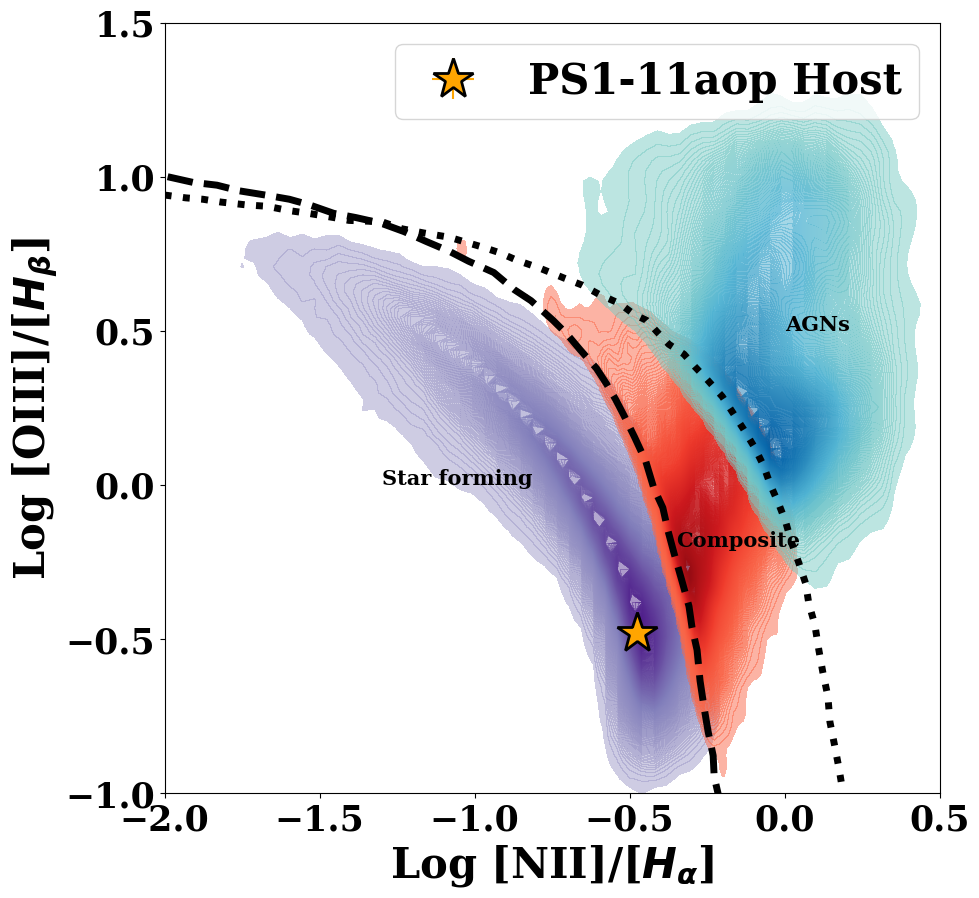

In [3]:
import matplotlib.colors as mcolors
import math
from scipy.stats import gaussian_kde
import matplotlib.colors as colors
from matplotlib import rc,rcParams

# This is to take the very white and very black parts of the default matplotlib colormaps off
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

####dashed line ####
dashed_x = [-1.9902597402597404,-1.9090909090909092,-1.8311688311688312,-1.7597402597402598,-1.6753246753246755,-1.5974025974025974,
            -1.5324675324675325,-1.3831168831168832,-1.301948051948052,-1.2272727272727273,-1.155844155844156,-1.0811688311688312,
            -1.0194805194805194,-0.9383116883116884,-0.8733766233766234,-0.8181818181818181,-0.7467532467532467,-0.7012987012987013,
            -0.6590909090909092,-0.6071428571428572,-0.5746753246753245,-0.5454545454545454,-0.5194805194805197,-0.4837662337662336,
            -0.44805194805194803,-0.4220779220779223,-0.3928571428571428,-0.3766233766233764,-0.3571428571428572,-0.331168831168831,
            -0.3084415584415585,-0.2987012987012987,-0.2824675324675323,-0.2727272727272725,-0.2597402597402598,-0.24675324675324672,
            -0.23051948051948035,-0.22727272727272707,-1.4545454545454546,-0.1]
                     
dashed_y = [1.0000000000000004, 0.981707317073171, 0.9725609756097564,0.9542682926829271, 0.9405487804878052, 0.9268292682926832,
            0.9085365853658539, 0.8673780487804881, 0.8490853658536588, 0.821646341463415, 0.7896341463414637, 0.7576219512195125,
            0.7256097560975613, 0.6890243902439027, 0.6341463414634149, 0.5975609756097564, 0.5335365853658538, 0.4878048780487807,
            0.4375000000000002, 0.3780487804878052, 0.3277439024390245, 0.27743902439024404, 0.22713414634146356, 0.15396341463414664,
            0.07621951219512213, -0.010670731707316916, -0.0746951219512193, -0.14786585365853644, -0.22103658536585358, -0.3124999999999998,
            -0.39481707317073145, -0.46341463414634143, -0.5365853658536586, -0.6371951219512195, -0.7240853658536586, -0.8018292682926829,
            -0.8795731707317072, -0.9481707317073171, 0.8810975609756101,-1.5]

#sorting the dashed lines
zipped_lists = zip(dashed_x, dashed_y)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
dashed_x,dashed_y = [ list(tuple) for tuple in  tuples]

###### dotted line ######
file_in1 = 'bpt_plot_data.csv'
data_plot1 = ascii.read(file_in1)
dotted_x = data_plot1['col1']
dotted_y = data_plot1['col2']
#sorting the dotted lines
zipped_lists = zip(dotted_x, dotted_y)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
dotted_x,dotted_y = [ list(tuple) for tuple in  tuples]

file_ina = 'sections.csv'
dataplot = ascii.read(file_ina)
logxaxis = dataplot['logxaxis'] 
logyaxis = dataplot['logyaxis'] 
sec = dataplot['sections'] 

indexa = np.where(dataplot['sections'] == 'section1')[0]
data_plota = dataplot[indexa]

indexb = np.where(dataplot['sections'] == 'section2')[0]
data_plotb = dataplot[indexb]

indexc = np.where(dataplot['sections'] == 'section3')[0]
data_plotc = dataplot[indexc]

# Extract x1 and y1
x1 = data_plota['logxaxis']
y1 = data_plota['logyaxis']
# Define the borders
deltaX1 = (max(x1) - min(x1))/10
deltaY1 = (max(y1) - min(y1))/10
xmin1 = min(x1) - deltaX1
xmax1 = max(x1) + deltaX1
ymin1 = min(y1) - deltaY1
ymax1 = max(y1) + deltaY1

# Create meshgrid
xx1, yy1 = np.mgrid[xmin1:xmax1:100j, ymin1:ymax1:100j]
#fit a gaussian
positions1 = np.vstack([xx1.ravel(), yy1.ravel()])
values1 = np.vstack([x1, y1])
kernel1 = gaussian_kde(values1)
f1 = np.reshape(kernel1(positions1).T, xx1.shape)


# Extract x2 and y2
x2 = data_plotb['logxaxis']
y2 = data_plotb['logyaxis']
# Define the borders
deltaX2 = (max(x2) - min(x2))/10
deltaY2 = (max(y2) - min(y2))/10
xmin2 = min(x2) - deltaX2
xmax2 = max(x2) + deltaX2
ymin2 = min(y2) - deltaY2
ymax2 = max(y2) + deltaY2

# Create meshgrid
xx2, yy2 = np.mgrid[xmin2:xmax2:100j, ymin2:ymax2:100j]
#fit a gaussian
positions2 = np.vstack([xx2.ravel(), yy2.ravel()])
values2 = np.vstack([x2, y2])
kernel2 = gaussian_kde(values2)
f2 = np.reshape(kernel2(positions2).T, xx2.shape)


# Extract x3 and y3
x3 = data_plotc['logxaxis']
y3 = data_plotc['logyaxis']
# Define the borders
deltaX3 = (max(x3) - min(x3))/10
deltaY3 = (max(y3) - min(y3))/10
xmin3 = min(x3) - deltaX3
xmax3 = max(x3) + deltaX3
ymin3 = min(y3) - deltaY3
ymax3 = max(y3) + deltaY3

# Create meshgrid
xx3, yy3 = np.mgrid[xmin3:xmax3:100j, ymin3:ymax3:100j]
#fit a gaussian
positions3 = np.vstack([xx3.ravel(), yy3.ravel()])
values3 = np.vstack([x3, y3])
kernel3 = gaussian_kde(values3)
f3 = np.reshape(kernel3(positions3).T, xx3.shape)

idx3 = f3.argsort()
idx2 = f2.argsort()
idx1 = f1.argsort()

#plot 1
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
step = 0.02
cmap1=truncate_colormap(plt.get_cmap('Purples'), 0.45, 0.9)
m1 = np.amax(f1)
levels1 = np.arange(0.0, m1, step) + step
cfset1 = ax.contourf(xx1, yy1, f1,levels1, s=20, edgecolor='',cmap=cmap1,alpha=0.5)

cmap2=truncate_colormap(plt.get_cmap('Reds'), 0.45, 0.9)
m2 = np.amax(f2)
levels2 = np.arange(0.0, m2, step) + step
cfset2 = ax.contourf(xx2, yy2, f2,levels2, s=20, edgecolor='',cmap=cmap2,alpha=0.5)

cmap3=truncate_colormap(plt.get_cmap('GnBu'), 0.45, 0.9)
m3 = np.amax(f3)
levels3 = np.arange(0.0, m3, step) + step
cfset3 = ax.contourf(xx3, yy3, f3,levels3, s=20, edgecolor='',cmap=cmap3,alpha=0.5)

#PS1-11aop
#plt.errorbar(np.log10(0.3376343278605599), np.log10(0.45298388361492015),xerr=0.004439310323390895,yerr= 0.006911607148913092,fmt='*', color = 'orange',markersize=30,markeredgecolor='k',markeredgewidth=2,label='PS1-11aop Host')
#0.3330625398936241 0.32883462939892405 0.002011961644533891 0.008133068863581039
plt.errorbar(np.log10(0.3330625398936241), np.log10(0.32883462939892405),xerr=0.002011961644533891,yerr= 0.008133068863581039,fmt='*', color = 'orange',markersize=30,markeredgecolor='k',markeredgewidth=2,label='PS1-11aop Host')

#### dashed and dotted lines #####
plt.plot(dashed_x, dashed_y,'--', color ='black',lw=5)
plt.plot(dotted_x, dotted_y,':', color ='black',lw=5)

rc('font', weight='bold')
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 25})
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)

plt.text(-1.3,0,'Star forming',fontsize = 15, color='k')
plt.text(-0.35,-0.2,'Composite',fontsize = 15, color='k')
plt.text(0,0.5,'AGNs',fontsize = 15, color='k')

plt.xlim(-2,0.5)
plt.ylim(-1,1.5)
#cset = ax.contour(xx, yy, f, colors='k')
ax.set_xlabel(r'Log [NII]/[$H_{\alpha}$]',fontsize = 30, fontweight='bold')
ax.set_ylabel(r'Log [OIII]/[$H_{\beta}$]',fontsize = 30, fontweight='bold')
plt.legend(fontsize=30)
#plt.savefig('BPT.png',bbox_inches='tight',dpi = 300, transparent = True)

/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_19955/3005691259.py:133: UserWarning: The following kwargs were not used by contour: 's', 'edgecolor'
  cfset1 = ax.contourf(xx1, yy1, f1,levels1, s=20, edgecolor='',cmap=cmap1,)
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_19955/3005691259.py:138: UserWarning: The following kwargs were not used by contour: 's', 'edgecolor'
  cfset2 = ax.contourf(xx2, yy2, f2,levels2, s=20, edgecolor='',cmap=cmap2)
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_19955/3005691259.py:143: UserWarning: The following kwargs were not used by contour: 's', 'edgecolor'
  cfset3 = ax.contourf(xx3, yy3, f3,levels3, s=20, edgecolor='',cmap=cmap3)


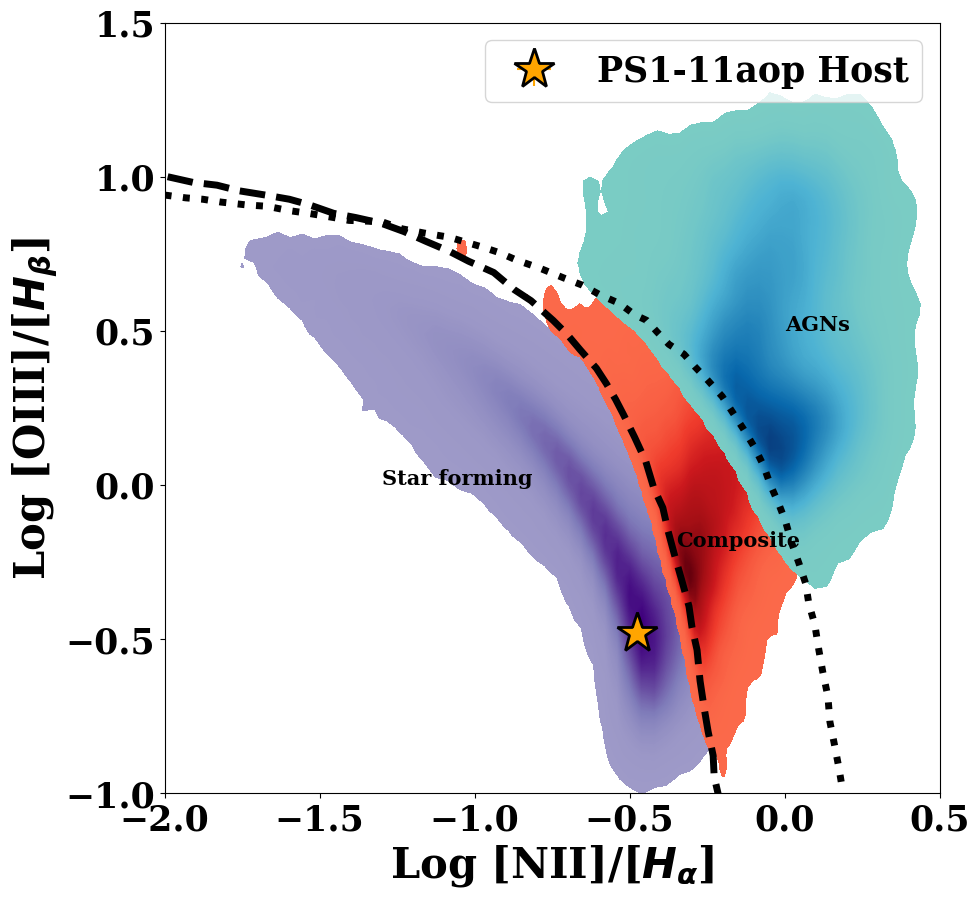

In [8]:
import matplotlib.colors as mcolors
import math
from scipy.stats import gaussian_kde
import matplotlib.colors as colors
from matplotlib import rc,rcParams

# This is to take the very white and very black parts of the default matplotlib colormaps off
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

####dashed line ####
dashed_x = [-1.9902597402597404,-1.9090909090909092,-1.8311688311688312,-1.7597402597402598,-1.6753246753246755,-1.5974025974025974,
            -1.5324675324675325,-1.3831168831168832,-1.301948051948052,-1.2272727272727273,-1.155844155844156,-1.0811688311688312,
            -1.0194805194805194,-0.9383116883116884,-0.8733766233766234,-0.8181818181818181,-0.7467532467532467,-0.7012987012987013,
            -0.6590909090909092,-0.6071428571428572,-0.5746753246753245,-0.5454545454545454,-0.5194805194805197,-0.4837662337662336,
            -0.44805194805194803,-0.4220779220779223,-0.3928571428571428,-0.3766233766233764,-0.3571428571428572,-0.331168831168831,
            -0.3084415584415585,-0.2987012987012987,-0.2824675324675323,-0.2727272727272725,-0.2597402597402598,-0.24675324675324672,
            -0.23051948051948035,-0.22727272727272707,-1.4545454545454546,-0.1]
                     
dashed_y = [1.0000000000000004, 0.981707317073171, 0.9725609756097564,0.9542682926829271, 0.9405487804878052, 0.9268292682926832,
            0.9085365853658539, 0.8673780487804881, 0.8490853658536588, 0.821646341463415, 0.7896341463414637, 0.7576219512195125,
            0.7256097560975613, 0.6890243902439027, 0.6341463414634149, 0.5975609756097564, 0.5335365853658538, 0.4878048780487807,
            0.4375000000000002, 0.3780487804878052, 0.3277439024390245, 0.27743902439024404, 0.22713414634146356, 0.15396341463414664,
            0.07621951219512213, -0.010670731707316916, -0.0746951219512193, -0.14786585365853644, -0.22103658536585358, -0.3124999999999998,
            -0.39481707317073145, -0.46341463414634143, -0.5365853658536586, -0.6371951219512195, -0.7240853658536586, -0.8018292682926829,
            -0.8795731707317072, -0.9481707317073171, 0.8810975609756101,-1.5]

#sorting the dashed lines
zipped_lists = zip(dashed_x, dashed_y)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
dashed_x,dashed_y = [ list(tuple) for tuple in  tuples]

###### dotted line ######
file_in1 = 'bpt_plot_data.csv'
data_plot1 = ascii.read(file_in1)
dotted_x = data_plot1['col1']
dotted_y = data_plot1['col2']
#sorting the dotted lines
zipped_lists = zip(dotted_x, dotted_y)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
dotted_x,dotted_y = [ list(tuple) for tuple in  tuples]

file_ina = 'sections.csv'
dataplot = ascii.read(file_ina)
logxaxis = dataplot['logxaxis'] 
logyaxis = dataplot['logyaxis'] 
sec = dataplot['sections'] 

indexa = np.where(dataplot['sections'] == 'section1')[0]
data_plota = dataplot[indexa]

indexb = np.where(dataplot['sections'] == 'section2')[0]
data_plotb = dataplot[indexb]

indexc = np.where(dataplot['sections'] == 'section3')[0]
data_plotc = dataplot[indexc]

# Extract x1 and y1
x1 = data_plota['logxaxis']
y1 = data_plota['logyaxis']
# Define the borders
deltaX1 = (max(x1) - min(x1))/10
deltaY1 = (max(y1) - min(y1))/10
xmin1 = min(x1) - deltaX1
xmax1 = max(x1) + deltaX1
ymin1 = min(y1) - deltaY1
ymax1 = max(y1) + deltaY1

# Create meshgrid
xx1, yy1 = np.mgrid[xmin1:xmax1:100j, ymin1:ymax1:100j]
#fit a gaussian
positions1 = np.vstack([xx1.ravel(), yy1.ravel()])
values1 = np.vstack([x1, y1])
kernel1 = gaussian_kde(values1)
f1 = np.reshape(kernel1(positions1).T, xx1.shape)


# Extract x2 and y2
x2 = data_plotb['logxaxis']
y2 = data_plotb['logyaxis']
# Define the borders
deltaX2 = (max(x2) - min(x2))/10
deltaY2 = (max(y2) - min(y2))/10
xmin2 = min(x2) - deltaX2
xmax2 = max(x2) + deltaX2
ymin2 = min(y2) - deltaY2
ymax2 = max(y2) + deltaY2

# Create meshgrid
xx2, yy2 = np.mgrid[xmin2:xmax2:100j, ymin2:ymax2:100j]
#fit a gaussian
positions2 = np.vstack([xx2.ravel(), yy2.ravel()])
values2 = np.vstack([x2, y2])
kernel2 = gaussian_kde(values2)
f2 = np.reshape(kernel2(positions2).T, xx2.shape)


# Extract x3 and y3
x3 = data_plotc['logxaxis']
y3 = data_plotc['logyaxis']
# Define the borders
deltaX3 = (max(x3) - min(x3))/10
deltaY3 = (max(y3) - min(y3))/10
xmin3 = min(x3) - deltaX3
xmax3 = max(x3) + deltaX3
ymin3 = min(y3) - deltaY3
ymax3 = max(y3) + deltaY3

# Create meshgrid
xx3, yy3 = np.mgrid[xmin3:xmax3:100j, ymin3:ymax3:100j]
#fit a gaussian
positions3 = np.vstack([xx3.ravel(), yy3.ravel()])
values3 = np.vstack([x3, y3])
kernel3 = gaussian_kde(values3)
f3 = np.reshape(kernel3(positions3).T, xx3.shape)

idx3 = f3.argsort()
idx2 = f2.argsort()
idx1 = f1.argsort()

#plot 1
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
step = 0.02
cmap1=truncate_colormap(plt.get_cmap('Purples'), 0.5, 1.0)
m1 = np.amax(f1)
levels1 = np.arange(0.0, m1, step) + step
cfset1 = ax.contourf(xx1, yy1, f1,levels1, s=20, edgecolor='',cmap=cmap1,)

cmap2=truncate_colormap(plt.get_cmap('Reds'), 0.5, 1.0)
m2 = np.amax(f2)
levels2 = np.arange(0.0, m2, step) + step
cfset2 = ax.contourf(xx2, yy2, f2,levels2, s=20, edgecolor='',cmap=cmap2)

cmap3=truncate_colormap(plt.get_cmap('GnBu'), 0.5, 1.0)
m3 = np.amax(f3)
levels3 = np.arange(0.0, m3, step) + step
cfset3 = ax.contourf(xx3, yy3, f3,levels3, s=20, edgecolor='',cmap=cmap3)

#PS1-11aop
#plt.errorbar(np.log10(0.3376343278605599), np.log10(0.45298388361492015),xerr=0.004439310323390895,yerr= 0.006911607148913092,fmt='*', color = 'orange',markersize=30,markeredgecolor='k',markeredgewidth=2,label='PS1-11aop Host')
#0.3330625398936241 0.32883462939892405 0.002011961644533891 0.008133068863581039
plt.errorbar(np.log10(0.3330625398936241), np.log10(0.32883462939892405),xerr=0.002011961644533891,yerr= 0.008133068863581039,fmt='*', color = 'orange',markersize=30,markeredgecolor='k',markeredgewidth=2,label='PS1-11aop Host')

#### dashed and dotted lines #####
plt.plot(dashed_x, dashed_y,'--', color ='black',lw=5)
plt.plot(dotted_x, dotted_y,':', color ='black',lw=5)

rc('font', weight='bold')
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 25})
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)

plt.text(-1.3,0,'Star forming',fontsize = 15, color='k')
plt.text(-0.35,-0.2,'Composite',fontsize = 15, color='k')
plt.text(0,0.5,'AGNs',fontsize = 15, color='k')

plt.xlim(-2,0.5)
plt.ylim(-1,1.5)
#cset = ax.contour(xx, yy, f, colors='k')
ax.set_xlabel(r'Log [NII]/[$H_{\alpha}$]',fontsize = 30, fontweight='bold')
ax.set_ylabel(r'Log [OIII]/[$H_{\beta}$]',fontsize = 30, fontweight='bold')
plt.legend(fontsize=25)
plt.savefig('BPT.png',bbox_inches='tight',dpi = 300, transparent = True)